## Actividad 4

##### a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el análisis?. Revise si existen casos faltantes en la base de datos, según la descripción de las variables, ¿qué pudiera significar un NA? Tome decisiones de qué hacer si existen casos faltantes. Si desea imputar los valores nulos de alguna variable por un valor puede utilizar data["columna"].fillna('valor', inplace = True).

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('House_price.csv',sep=';')
df.sample(5)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
1084,1085,NaN,13031,0.0,592,0,99,691,691,807,...,1498,409,315,44,0,0,0,0,0,187500
314,315,60.0,9600,0.0,16,0,712,728,832,809,...,1641,546,0,0,234,0,0,0,0,178000
356,357,NaN,9248,106.0,560,0,598,1158,1167,0,...,1167,400,120,26,0,0,0,0,0,173000
775,776,32.0,4500,320.0,866,0,338,1204,1204,0,...,1204,412,0,247,0,0,0,0,0,162000
697,698,57.0,6420,0.0,210,551,219,980,1148,0,...,1148,308,0,0,0,0,0,0,0,123500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

Variables con **nulos**:

**MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados

**LotFrontage**: Pies lineales de calle conectados a la propiedad

In [4]:
# Variable no util: ID
df = df.drop(columns=['Id'])

In [5]:
# Variables con null: LotFrontage, MasVnrArea
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(), inplace = True)

In [6]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace = True)

##### b) La variable a modelar corresponde al precio de venta de la casa en dólares. En base a los modelos que hemos aprendido en clases, ¿qué modelo(s) podría(n) ser de utilidad para predecir el precio de venta de casas mediante las variables predictoras?

- SVM

- Random Forest

- Regresion lineal 

- Gradient Boosting

##### c) Vamos a implementar un modelo de regresión lineal para modelar el precio de venta de casas. Considerando que en la base de datos tenemos varias variables que dependen de otras, ¿cuál pudiera ser el problema que surgiría en este contexto? ¿por qué esto es un problema? Discuta.

##### d) Realice un análisis de la correlación entre las variables. Comente, ¿existen variables muy correlacionadas entre sí? ¿Por qué cree que ocurre?

In [7]:
import seaborn as sns

In [8]:
matriz_correlacion = df.corr()
#matriz_filtrada = matriz_correlacion.mask(abs(matriz_correlacion) < 0.5)
condicion1 = matriz_correlacion >= 0.4
condicion2 = matriz_correlacion <= -0.4
matriz_filtrada = matriz_correlacion.mask(~(condicion1 | condicion2)).where(condicion1 | condicion2)

In [9]:
mask = matriz_correlacion > 0.5

<AxesSubplot: >

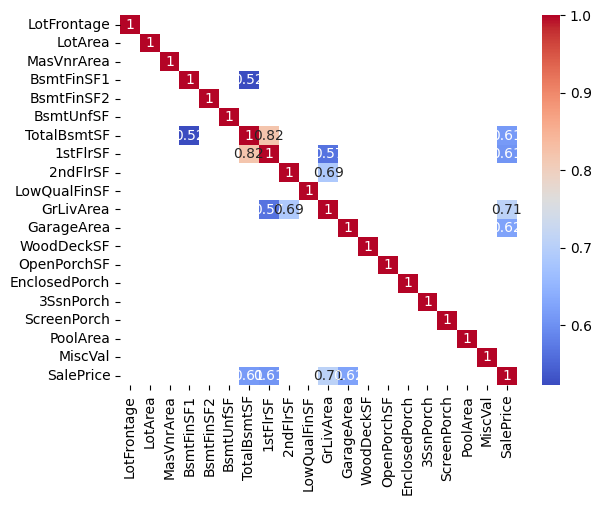

In [10]:
matriz_correlacion[mask]
sns.heatmap(matriz_correlacion[mask], annot=True,cmap = 'coolwarm')

In [11]:
sns.set(rc={'figure.figsize':(16,13)})

<AxesSubplot: >

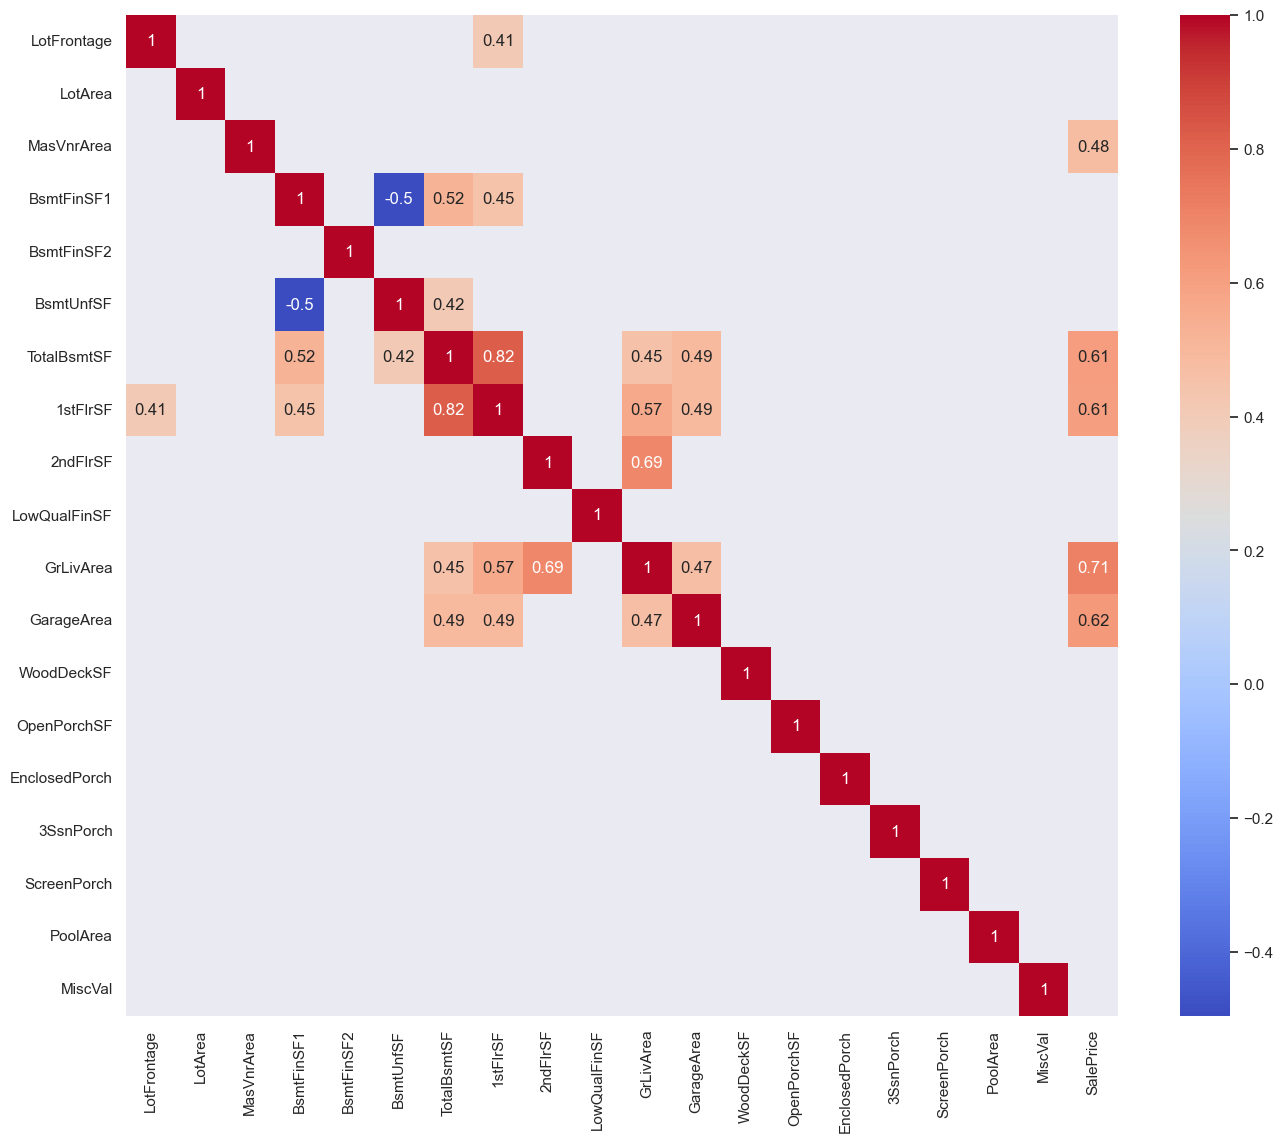

In [12]:
sns.heatmap(matriz_filtrada.drop('SalePrice'), annot=True,cmap = 'coolwarm')

Dentro de las variables de entrenamiento con mayor correlacion encontramos 1stFlrSF con TotalBsmtSF que son total de pies cuadrados del primer piso y total de pies cuadrados del sotano respectivamente, lo cual hace todo sentido ya que el sotano que se encuentro bajo el primero piso en general tendra el mismo tamaño o muy cercano al tamaño del primer piso  mientras que otras de las variables relacionadas son GrLivArea con 2ndFlrSF las cuales corresponden a total de pies cuadrados del segundo piso y total de pies cuadrados habitables, lo cual tambien tiene sentido si pensamos que las habitaciones n general se encuentran en el segundo piso, mientras que lugares como cocina, lavanderia, baños de visita se encuentran en el primer piso y constituyen el espacio no habitable.

##### e) Suponga que este es un problema de gran volumen, donde tenemos muchas columnas y registros. Cuando existen variables muy correlacionadas el costo computacional para obtener el modelo puede ser muy elevado. Obtenga el tiempo de procesamiento para obtener una regresión lineal. Para esto, podemos obtener la regresión lineal utilizando la función LinearRegression de sklearn.linear_model y calcular el tiempo de procesamiento de la siguiente forma: 

from datetime import datetime 

start=datetime.now() 

[aquí va el código del modelo] 

print(datetime.now()-start) #esto entrega el tiempo que demoró en correr el modelo.

In [13]:
from sklearn.linear_model import LinearRegression

In [26]:
from datetime import datetime 
model = LinearRegression()
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

start=datetime.now() 

model.fit(X,y)

print(datetime.now()-start) #esto entrega el tiempo que demoró en correr el modelo.

0:00:00.004000


In [15]:
X_scaler = StandardScaler().fit_transform(X)

##### f) Obtenga las componentes principales utilizando las variables estandarizadas, si desea explicar un 80% de la variabilidad, ¿cuántas componentes debería elegir? Argumente.

In [16]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [17]:
pca = PCA(n_components=0.8)
pca.fit(X_scaler)
X_pca = pca.transform(X_scaler)

n_components = X_pca.shape[1]

In [18]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.20974689, 0.30429316, 0.38433835, 0.45265864, 0.51107426,
       0.56664554, 0.61963792, 0.67188937, 0.72186245, 0.76904562,
       0.8141376 ])

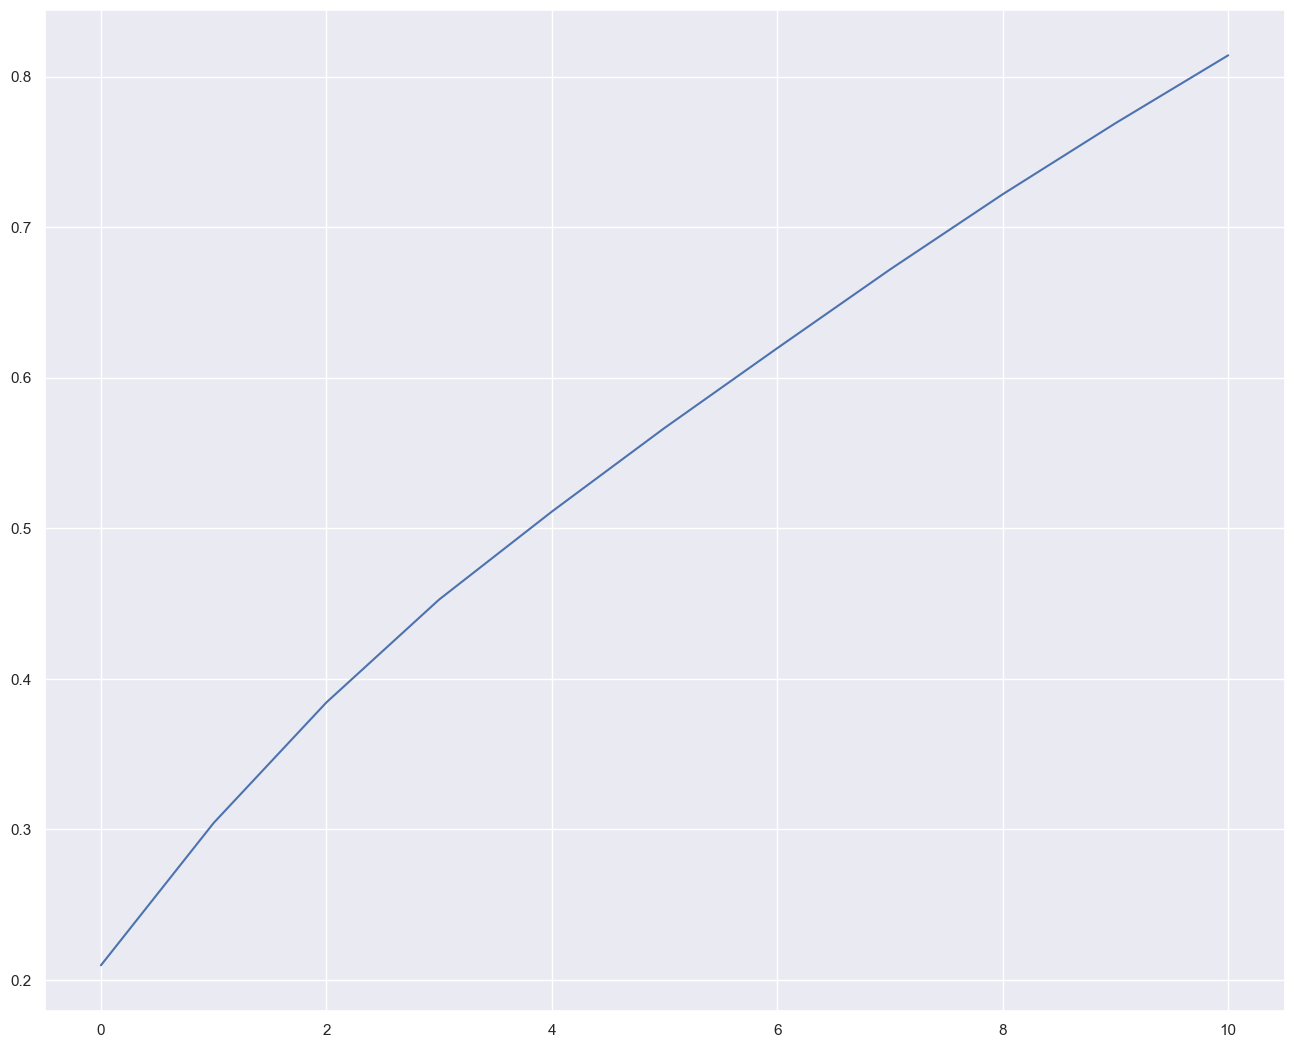

In [19]:
plt.plot(range(n_components), cum_sum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.20974689 0.09454627 0.08004519 0.06832028 0.05841562 0.05557128
 0.05299238 0.05225145 0.04997308 0.04718317 0.04509198]


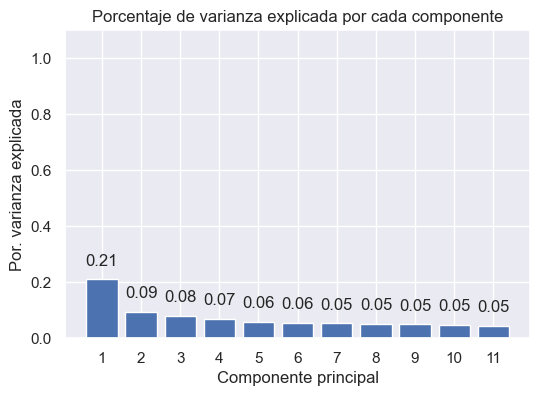

In [20]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso el modelo nos dice que son 11 los componentes principales que explican el 80% de la variabilidad de los datos de entrenamiento.

##### g) Corra el modelo de regresión lineal con las componentes principales como variables predictoras. Vuelva a calcular el tiempo de procesamiento. ¿En cuál caso suele demorarse menos? ¿Qué ganamos al realizar componentes principales? Concluya.

In [30]:
model = LinearRegression()

start=datetime.now() 

model.fit(X_pca,y)

print(datetime.now()-start) #esto entrega el tiempo que demoró en correr el modelo.

0:00:00.001999


Al correr nuevamente el modelo de regresion lineal con los componentes principales entregados por el modelo PCA, se ve una reduccion de tiempo de la mitad pasando de 0.004 segundos a 0.002, con esto pensando en mayores cantidades de informacion, ganamos espacio en memoria, y una reduccion de los recursos usados por la maquina que tenga que compilar el modelo.